# Курсовая работа

Было предложено мною рассмотреть датасет [__Spotify Top 200 charts__](https://www.kaggle.com/sashankpillai/spotify-top-200-charts-20202021/discussion/265669). <br>

1) исследовать, связана ли популярность с такими показателями как energy, danceability<br>
2) Рассмотреть гипотезу о том, что жанр поп имеет больше стримов, чем, скажем, rap

"___По курсовой, да, можно исследовать популярность, например, сначала рассмотреть описательные статистики, распределение, выбросы, затем с помощью регрессии изучить какие факторы влияют на популярность, если взять какой-то категориальный фактор, то его влияение можно изучить с помощью диперсионного анализа___"

In [808]:
import pandas as pd

### Готовим данные

In [809]:
DATASET_PATH = './Data/spotify_dataset.csv'

df = pd.read_csv(DATASET_PATH)


In [810]:
df.dtypes

Index                         int64
Highest Charting Position     int64
Number of Times Charted       int64
Week of Highest Charting     object
Song Name                    object
Streams                      object
Artist                       object
Artist Followers             object
Song ID                      object
Genre                        object
Release Date                 object
Weeks Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object

Будем исследовать популярность, подготовим - переведем в целочисленные, уберем пропуски и пробелы, вместо них 0

In [811]:
df['Popularity'].fillna(0, inplace = True)
df['Popularity'].replace(" ", 0, inplace = True)
df["Popularity"] = df['Popularity'].astype(int)

In [812]:
df["Popularity"].value_counts().sort_index()


0      47
1       5
2       2
3       1
15      1
29      2
34      1
36      1
38      1
41      6
42      4
43      3
44      8
45      3
46      1
47      5
48      2
49      8
50      2
51      9
52      4
53      9
54     12
55     12
56     13
57     19
58     22
59     24
60     30
61     24
62     35
63     33
64     39
65     28
66     44
67     54
68     36
69     51
70     55
71     43
72     64
73     55
74     52
75     67
76     66
77     62
78     47
79     52
80     58
81     54
82     51
83     54
84     46
85     28
86     20
87     19
88      9
89     18
90      7
91      3
92      6
93      2
94      5
95      5
96      2
97      1
98      1
99      2
100     1
Name: Popularity, dtype: int64

Выбросов не наблюдаем

In [813]:
df

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


С такой колонкой жанры работать неудобно

Здесь мы создадим кучу дамми, чтобы легче было работать с жанрами: один исполнитель может быть и поп, и рок, и электроника - мы создадим что-то типа тэгов

In [814]:
#df.replace({'[':''}, inplace = True)
#df.replace({']':''}, inplace = True)

#df['Genre'].dtype

Здесь мы с Вами наблюдаем мои жалкие попытки избавиться от квадратных скобок, потому что они портят мне в дальнейшем one-hot-encoding. Я буду очень признателен, если вы научите меня делать это адекватно и эффективно - я пока ни нагуглить не смог, ни разобраться

In [815]:
df['Genre'] = df['Genre'].astype(str)

In [816]:
#df['Genre'].replace({'[':''}, inplace = True)
#df['Genre'].replace({']':''}, inplace = True)

#df['Genre']

#да что такое?!!!

In [817]:

df1 = pd.get_dummies(df['Genre'].str.get_dummies(sep = ', '))
df = pd.concat([df, df1], axis = 1)

df.drop("Genre", axis = 1, inplace = True)
df

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Release Date,...,['trap chileno',['trap latino'],['trap queen'],['tropical house'],['uk hip hop'],['urbano espanol'],['venezuelan hip hop'],['viral rap'],['weirdcore'],[]
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,2017-12-08,...,0,0,0,0,0,0,0,0,0,0
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,2021-07-09,...,0,0,0,0,0,0,0,0,0,0
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,2021-05-21,...,0,0,0,0,0,0,0,0,0,0
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,2021-06-25,...,0,0,0,0,0,0,0,0,0,0
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,2021-07-23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,2017-06-02,...,0,0,0,0,0,0,0,0,0,0
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,2019-10-11,...,0,0,0,0,0,0,0,0,0,0
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,2018-01-12,...,0,0,0,0,0,0,0,0,0,0
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,2019-09-25,...,0,0,0,0,0,0,0,0,0,0


В конце у нас столбец без названия - он появился в результате one-hot-encoding. Удалим его

In [818]:
df.drop(df.columns[-1], axis = 1, inplace = True)

In [819]:
df.describe()

,Index,Highest Charting Position,Number of Times Charted,Popularity,,'american folk revival'],'art rock','atl trap','australian pop','beatlesque',...,['trap argentino'],['trap chileno',['trap latino'],['trap queen'],['tropical house'],['uk hip hop'],['urbano espanol'],['venezuelan hip hop'],['viral rap'],['weirdcore']
count,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,...,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380,69.593830,0.007069,0.000643,0.002571,0.008355,0.004499,0.001928,...,0.000643,0.000643,0.002571,0.000643,0.000643,0.005141,0.001285,0.000643,0.001285,0.000643
std,449.322824,58.147225,16.360546,16.826585,0.083809,0.025351,0.050653,0.091051,0.066943,0.043881,...,0.025351,0.025351,0.050653,0.025351,0.025351,0.071542,0.035840,0.025351,0.035840,0.025351
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,389.750000,37.000000,1.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,778.500000,80.000000,4.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1167.250000,137.000000,12.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1556.000000,200.000000,142.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [820]:
from matplotlib import pyplot as plt

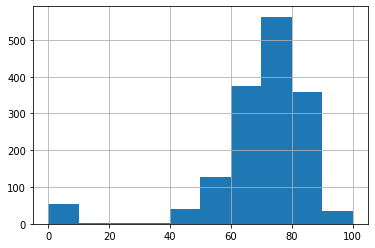

In [821]:
plt.figure()
df['Popularity'].hist()
plt.show()

Насчет выбросов: я неправ - много нулей и пропусков, также медиана, квантили смещены вправо. Остальное похоже на нормальное распределение. Впрочем, логично - в топе один трек самый-самый заслушанный, есть часть(вероятно, недавно попавшая) с несформированным показателем популярности, остальные легко попадают в серединку

In [822]:
df.dtypes

Index                             int64
Highest Charting Position         int64
Number of Times Charted           int64
Week of Highest Charting         object
Song Name                        object
Streams                          object
Artist                           object
Artist Followers                 object
Song ID                          object
Release Date                     object
Weeks Charted                    object
Popularity                        int64
Danceability                     object
Energy                           object
Loudness                         object
Speechiness                      object
Acousticness                     object
Liveness                         object
Tempo                            object
Duration (ms)                    object
Valence                          object
Chord                            object
                                  int64
'american folk revival']          int64
'art rock'                        int64


Все, что конвертируемо в числовые показатели, будет в них конвертировано уже в следующих строках:

In [823]:
df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Liveness']].fillna(0)

,Danceability,Energy,Loudness,Speechiness,Liveness
0,0.714,0.8,-4.808,0.0504,0.359
1,0.591,0.764,-5.484,0.0483,0.103
2,0.563,0.664,-5.044,0.154,0.0849
3,0.808,0.897,-3.712,0.0348,0.364
4,0.736,0.704,-7.409,0.0615,0.0501
...,...,...,...,...,...
1551,0.762,0.7,-6.021,0.0694,0.153
1552,0.528,0.87,-3.123,0.0851,0.333
1553,0.765,0.523,-4.333,0.03,0.132
1554,0.832,0.55,-7.026,0.0587,0.182


In [824]:
df['Danceability'].replace(" ", 0, inplace = True)
df['Energy'].replace(" ", 0, inplace = True)
df['Loudness'].replace(" ", 0, inplace = True)
df['Speechiness'].replace(" ", 0, inplace = True)
df['Liveness'].replace(" ", 0, inplace = True)

По отдельности у меня не получилось, подскажите, пожалуйста, как бы вы это сделали?

In [825]:
df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Liveness']] = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Liveness']].astype(float)

Определим столбцы, котрые сотались в формате object, чтобы не мешали строить линейную регрессию - по ней планирую определить, какие признаки наиболее значимы. И index туда же, он нам не понадобится

In [826]:
object_columns = df.select_dtypes(include = 'object').columns.tolist()
object_columns.append('Index')

In [827]:
from sklearn.linear_model import LinearRegression

In [828]:
object_columns.append('Popularity')
object_columns

['Week of Highest Charting',
 'Song Name',
 'Streams',
 'Artist',
 'Artist Followers',
 'Song ID',
 'Release Date',
 'Weeks Charted',
 'Acousticness',
 'Tempo',
 'Duration (ms)',
 'Valence',
 'Chord',
 'Index',
 'Popularity']

In [830]:
model_linear = LinearRegression().fit(df.drop(columns =  object_columns, axis = 1), df["Popularity"])
print(type(model_linear))
model_linear.intercept_, model_linear.coef_

<class 'sklearn.linear_model._base.LinearRegression'>


(38.3658480999996,
 array([-2.94241422e-02,  1.33066878e-01, -2.97755962e-01, -1.70218158e+00,
         7.23796105e-01, -4.47061754e+00, -4.45127174e+00, -3.72438879e+01,
         4.48692443e+10, -1.54505581e+11,  1.45457745e+00, -4.29844800e+00,
         5.34681078e+10,  5.39435903e+00,  4.16591069e+00,  2.04144861e+10,
         7.61654769e+10, -1.86023218e+00, -1.12034176e+01, -3.10924738e+09,
        -2.21708904e+11, -4.45466151e+10, -2.28618064e+10, -7.46078519e+10,
        -7.08101023e+08, -7.20907237e+09, -1.99042864e+09,  1.64671382e+10,
         1.84607344e+10,  8.11150317e+10,  3.58752335e+10, -4.73877742e+10,
         3.71989340e+09,  2.67944336e-01, -2.25688236e+10,  2.25688236e+10,
        -5.28432715e+10,  1.14927845e+01,  2.81837115e+10,  7.77120876e+00,
         2.43595804e+10,  4.34795380e-01,  4.54590988e+00, -3.04438458e+10,
        -9.62900162e+00,  3.21553401e+10,  6.52569628e+00,  8.90998840e-01,
         4.38291526e+00, -5.72041845e+09, -2.93197000e+10,  5.6743592

Не, ну так ничего не понятно. Посмотрим, какие показатели самые полезные

In [831]:
import statsmodels.api as sm

In [832]:
model_1 = sm.OLS(df['Popularity'], sm.add_constant(df.drop(object_columns, axis = 1))).fit()
print_model_1 = model_1.summary()
print(print_model_1)

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     5.546
Date:                Tue, 19 Oct 2021   Prob (F-statistic):          1.22e-111
Time:                        01:00:44   Log-Likelihood:                -5832.1
No. Observations:                1556   AIC:                         1.239e+04
Df Residuals:                    1193   BIC:                         1.433e+04
Df Model:                         362                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Выведем топ-20 важных показателей (вообще-то я планировал поставить отсечку для p-value, скажем, 0.05 или меньше).

In [833]:
model_1.pvalues.sort_values().head(20)

['k-pop'                    3.453210e-62
['pop']                     8.976571e-58
['brooklyn drill']          2.063132e-46
['chicago rap']             3.190479e-35
['australian hip hop']      6.244371e-32
['german hip hop']          4.755907e-25
['contemporary country']    6.370450e-23
['uk hip hop']              2.843103e-21
['brooklyn drill'           7.502687e-20
'nyc rap']                  7.502687e-20
const                       1.614687e-18
'k-pop boy group']          1.983151e-18
['sad rap']                 2.316341e-17
'pop']                      4.337181e-16
['k-pop girl group']        2.958251e-15
['cali rap']                5.611222e-14
'pop urbaine'               9.038943e-14
['trap latino']             9.725318e-14
'neo-psychedelic']          1.858191e-13
['australian psych'         1.858191e-13
dtype: float64

### Вывод

Ну что мы тут можем сказать...во-первых, надо разобраться с этими '[', ']'. Потому что некоторые жанры он разбил на несколько: 'pop', '[pop', 'pop]'.

Я ожидал увидеть лишь несколько признаков, которые бы имели малый p-value и на них в дальнейшем провести дисперсионный анализ